<table>
<thead>
<tr>
<th>Column Name</th>
<th>Type</th>
<th>Description</th>
</tr>
</thead>
<tbody>
<tr>
<td>age</td>
<td>Continuous</td>
<td>The age of the individual</td>
</tr>
<tr>
<td>workclass</td>
<td>Categorical</td>
<td>The type of employer the  individual has (government,  military, private, etc.).</td>
</tr>
<tr>
<td>fnlwgt</td>
<td>Continuous</td>
<td>The number of people the census  takers believe that observation  represents (sample weight). This  variable will not be used.</td>
</tr>
<tr>
<td>education</td>
<td>Categorical</td>
<td>The highest level of education  achieved for that individual.</td>
</tr>
<tr>
<td>education_num</td>
<td>Continuous</td>
<td>The highest level of education in  numerical form.</td>
</tr>
<tr>
<td>marital_status</td>
<td>Categorical</td>
<td>Marital status of the individual.</td>
</tr>
<tr>
<td>occupation</td>
<td>Categorical</td>
<td>The occupation of the individual.</td>
</tr>
<tr>
<td>relationship</td>
<td>Categorical</td>
<td>Wife, Own-child, Husband,  Not-in-family, Other-relative,  Unmarried.</td>
</tr>
<tr>
<td>race</td>
<td>Categorical</td>
<td>White, Asian-Pac-Islander,  Amer-Indian-Eskimo, Other, Black.</td>
</tr>
<tr>
<td>gender</td>
<td>Categorical</td>
<td>Female, Male.</td>
</tr>
<tr>
<td>capital_gain</td>
<td>Continuous</td>
<td>Capital gains recorded.</td>
</tr>
<tr>
<td>capital_loss</td>
<td>Continuous</td>
<td>Capital Losses recorded.</td>
</tr>
<tr>
<td>hours_per_week</td>
<td>Continuous</td>
<td>Hours worked per week.</td>
</tr>
<tr>
<td>native_country</td>
<td>Categorical</td>
<td>Country of origin of the  individual.</td>
</tr>
<tr>
<td>income</td>
<td>Categorical</td>
<td>"&gt;50K" or "&lt;=50K", meaning  whether the person makes more  than \$50,000 annually.</td>
</tr>
</tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
census = pd.read_csv('census_data.csv')

In [3]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [124]:
census['income_bracket'].unique()

array([0, 1])

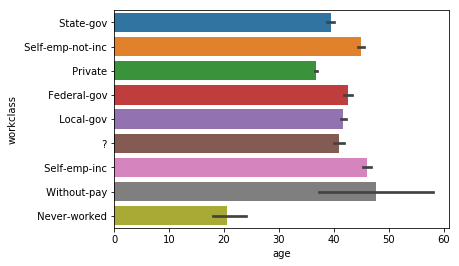

In [130]:
sns.barplot(y='workclass',x='age',data=census)

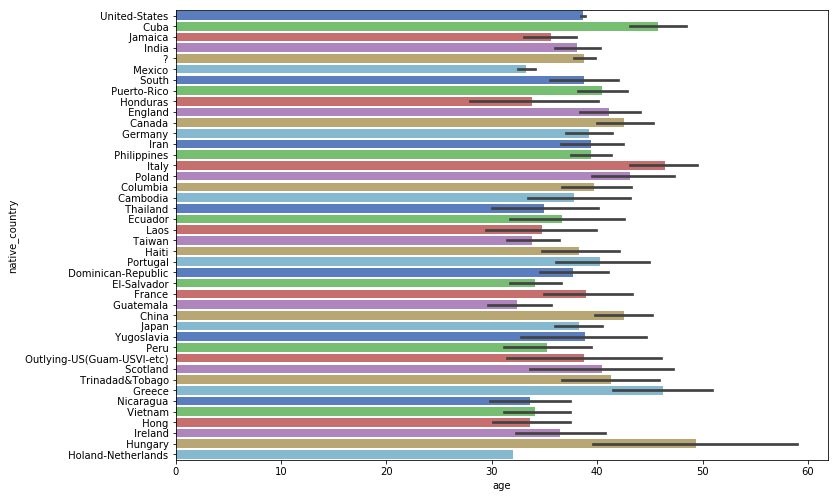

In [140]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(y='native_country',x='age',data=census,palette='muted')

In [5]:
def lable_encoder(lable):
    if lable == ' <=50K':
        return 0
    else:
        return 1

In [141]:
census['income_bracket'] = census['income_bracket'].apply(lable_encoder)

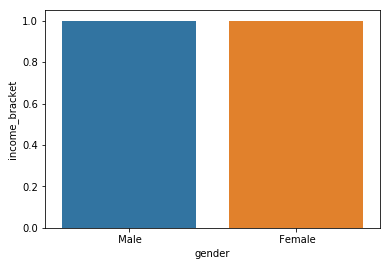

In [147]:
sns.barplot(y='income_bracket',x='gender',data=census)

In [8]:
census.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'gender', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income_bracket'],
      dtype='object')

In [9]:
gender = tf.feature_column.categorical_column_with_vocabulary_list("gender", ["Female", "Male"])
occupation = tf.feature_column.categorical_column_with_hash_bucket("occupation", hash_bucket_size=1000)
marital_status = tf.feature_column.categorical_column_with_hash_bucket("marital_status", hash_bucket_size=1000)
relationship = tf.feature_column.categorical_column_with_hash_bucket("relationship", hash_bucket_size=1000)
education = tf.feature_column.categorical_column_with_hash_bucket("education", hash_bucket_size=1000)
workclass = tf.feature_column.categorical_column_with_hash_bucket("workclass", hash_bucket_size=1000)
native_country = tf.feature_column.categorical_column_with_hash_bucket("native_country", hash_bucket_size=1000)

In [10]:
age = tf.feature_column.numeric_column("age")
education_num = tf.feature_column.numeric_column("education_num")
capital_gain = tf.feature_column.numeric_column("capital_gain")
capital_loss = tf.feature_column.numeric_column("capital_loss")
hours_per_week = tf.feature_column.numeric_column("hours_per_week")

In [11]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

In [12]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjffiy53o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0001d78dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [14]:
from sklearn.cross_validation import train_test_split
x_data = census.drop('income_bracket',axis=1)
y_lable = census['income_bracket']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_lable, test_size=0.2, random_state=148)

In [17]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=128, num_epochs=10000, shuffle=True)

In [18]:
model.train(input_func,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpjffiy53o/model.ckpt.
INFO:tensorflow:loss = 88.722855, step = 1
INFO:tensorflow:global_step/sec: 101.691
INFO:tensorflow:loss = 125.97421, step = 101 (0.985 sec)
INFO:tensorflow:global_step/sec: 173.511
INFO:tensorflow:loss = 468.13934, step = 201 (0.576 sec)
INFO:tensorflow:global_step/sec: 172.732
INFO:tensorflow:loss = 240.77344, step = 301 (0.580 sec)
INFO:tensorflow:global_step/sec: 179.386
INFO:tensorflow:loss = 130.08026, step = 401 (0.557 sec)
INFO:tensorflow:global_step/sec: 183.4
INFO:tensorflow:loss = 42.14197, step = 501 (0.547 sec)
INFO:tensorflow:global_step/sec: 168.207
INFO:tensorflow:loss = 100.67763, step = 601 (0.592 sec)
INFO:tensorflow:global_step/sec: 181.144
INFO:tensorflow:los

INFO:tensorflow:global_step/sec: 133.206
INFO:tensorflow:loss = 37.027946, step = 8101 (0.752 sec)
INFO:tensorflow:global_step/sec: 143.169
INFO:tensorflow:loss = 57.53511, step = 8201 (0.698 sec)
INFO:tensorflow:global_step/sec: 132.373
INFO:tensorflow:loss = 28.538067, step = 8301 (0.755 sec)
INFO:tensorflow:global_step/sec: 141.3
INFO:tensorflow:loss = 41.93434, step = 8401 (0.706 sec)
INFO:tensorflow:global_step/sec: 131.141
INFO:tensorflow:loss = 46.8235, step = 8501 (0.762 sec)
INFO:tensorflow:global_step/sec: 146.625
INFO:tensorflow:loss = 46.507767, step = 8601 (0.683 sec)
INFO:tensorflow:global_step/sec: 155.246
INFO:tensorflow:loss = 34.94098, step = 8701 (0.644 sec)
INFO:tensorflow:global_step/sec: 144.818
INFO:tensorflow:loss = 77.08538, step = 8801 (0.691 sec)
INFO:tensorflow:global_step/sec: 146.946
INFO:tensorflow:loss = 45.980637, step = 8901 (0.682 sec)
INFO:tensorflow:global_step/sec: 132.845
INFO:tensorflow:loss = 52.892807, step = 9001 (0.750 sec)
INFO:tensorflow:gl

In [19]:
pred_fun = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10, num_epochs=1, shuffle=False)

In [30]:
model_pred = list(model.predict(pred_fun))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjffiy53o/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [31]:
final_pred_values = [pred['class_ids'][0] for pred in list(model_pred)]

In [100]:
from sklearn.metrics import classification_report,mean_squared_error
print(classification_report(y_test,final_pred_values))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91      4919
          1       0.78      0.55      0.64      1594

avg / total       0.84      0.85      0.84      6513



In [101]:
print(mean_squared_error(y_test,final_pred_values))

0.1487793643482266


# Deep Neural Network Classification

In [60]:
feat_cols = [gender,occupation,marital_status,relationship,education,workclass,native_country,
            age,education_num,capital_gain,capital_loss,hours_per_week]

In [71]:
gender_dnn = tf.feature_column.embedding_column(gender,dimension=1)
occupation_dnn = tf.feature_column.embedding_column(occupation,dimension=1)
marital_status_dnn = tf.feature_column.embedding_column(marital_status,dimension=1)
relationship_dnn = tf.feature_column.embedding_column(relationship,dimension=1)
education_dnn = tf.feature_column.embedding_column(education,dimension=1)
workclass_dnn = tf.feature_column.embedding_column(workclass,dimension=1)
native_country_dnn = tf.feature_column.embedding_column(native_country,dimension=1)

Min Age: 17 
Max Age: 90


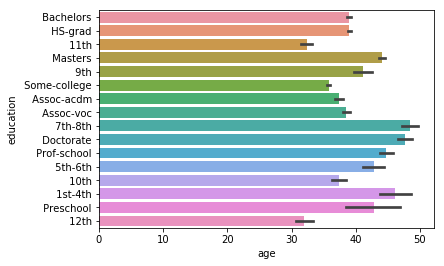

In [81]:
sns.barplot(x=census['age'],y=census['education'])
print("Min Age:",census['age'].min(),'\n'"Max Age:",census['age'].max())

In [113]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[10,20,30,40,50,60,70,80,90])

In [114]:
census.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [115]:
dnn_fec_cols = [occupation_dnn,marital_status_dnn,relationship_dnn,education_dnn,workclass_dnn,native_country_dnn,age,education_num,hours_per_week]

In [116]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[30,30,30,30,30],feature_columns=dnn_fec_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp8haibyo7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7effff63a438>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [117]:
input_func_dnn = tf.estimator.inputs.pandas_input_fn(x=X_train, y=y_train, batch_size=10, num_epochs=10000, shuffle=True)

In [118]:
dnn_model.train(input_fn=input_func_dnn,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp8haibyo7/model.ckpt.
INFO:tensorflow:loss = 4.963179, step = 1
INFO:tensorflow:global_step/sec: 163.498
INFO:tensorflow:loss = 8.183307, step = 101 (0.616 sec)
INFO:tensorflow:global_step/sec: 242.944
INFO:tensorflow:loss = 5.410246, step = 201 (0.415 sec)
INFO:tensorflow:global_step/sec: 234.441
INFO:tensorflow:loss = 3.177857, step = 301 (0.424 sec)
INFO:tensorflow:global_step/sec: 246.5
INFO:tensorflow:loss = 4.0992765, step = 401 (0.415 sec)
INFO:tensorflow:global_step/sec: 248.281
INFO:tensorflow:loss = 4.001817, step = 501 (0.390 sec)
INFO:tensorflow:global_step/sec: 245.611
INFO:tensorflow:loss = 3.2410233, step = 601 (0.408 sec)
INFO:tensorflow:global_step/sec: 231.405
INFO:tensorflow:loss = 

INFO:tensorflow:global_step/sec: 260.84
INFO:tensorflow:loss = 4.3390713, step = 8101 (0.383 sec)
INFO:tensorflow:global_step/sec: 247.818
INFO:tensorflow:loss = 3.4157352, step = 8201 (0.403 sec)
INFO:tensorflow:global_step/sec: 248.976
INFO:tensorflow:loss = 3.8805146, step = 8301 (0.405 sec)
INFO:tensorflow:global_step/sec: 246.381
INFO:tensorflow:loss = 4.1586514, step = 8401 (0.403 sec)
INFO:tensorflow:global_step/sec: 240.204
INFO:tensorflow:loss = 3.3061976, step = 8501 (0.416 sec)
INFO:tensorflow:global_step/sec: 255.52
INFO:tensorflow:loss = 1.2432983, step = 8601 (0.391 sec)
INFO:tensorflow:global_step/sec: 247.841
INFO:tensorflow:loss = 3.0416799, step = 8701 (0.404 sec)
INFO:tensorflow:global_step/sec: 247.284
INFO:tensorflow:loss = 4.426212, step = 8801 (0.404 sec)
INFO:tensorflow:global_step/sec: 247.979
INFO:tensorflow:loss = 3.2222285, step = 8901 (0.404 sec)
INFO:tensorflow:global_step/sec: 248.476
INFO:tensorflow:loss = 7.32094, step = 9001 (0.403 sec)
INFO:tensorflow

In [119]:
pred_func = tf.estimator.inputs.pandas_input_fn(x=X_test,batch_size=10, num_epochs=1, shuffle=False)

In [120]:
prediction_dnn = list(dnn_model.predict(pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8haibyo7/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [121]:
dnn_final_pred = [preds['class_ids'][0] for preds in prediction_dnn]

In [122]:
print(classification_report(y_test,dnn_final_pred))

             precision    recall  f1-score   support

          0       0.85      0.94      0.89      4919
          1       0.73      0.50      0.59      1594

avg / total       0.82      0.83      0.82      6513



In [123]:
print(mean_squared_error(y_test,final_pred_values))

0.1487793643482266
